In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import re

%matplotlib inline

# Show all df rows
# pd.set_option('display.max_rows', None)

In [123]:
data_root = "/tmp/llama-q3-s23_latest"
module_data = pd.read_csv(f'{data_root}/calls_merged_per_module.csv')
op_data_files = glob.glob(f"{data_root}/calls_* _*.csv")


In [124]:
module_data['Throughput'] = module_data['Count']/(module_data['Duration (us)']/10**3)

In [125]:
module_data

,Module,Count,Duration (us),Duration(us),ArgumentShapes,Throughput
0,decode,93,1.502630e+07,0.000,"uint32[12288, 412], float16[12288, 103], float...",0.006189
1,embed,97,3.937193e+03,0.000,0,24.636842
2,prefill,4,1.184431e+07,98378.125,"float16[18, 96, 128], float16[18, 32, 128]",0.000338


In [126]:
all_dfs = []
for file in op_data_files:
    module_regex = r'calls_(\w+) _(\d+).csv'
    module, iteration = re.search(module_regex, file).groups()
    op_data = pd.read_csv(file)
    op_data['iteration'] = int(iteration)
    all_dfs.append(op_data)

op_dfs = pd.concat(all_dfs)
display(op_dfs)

,Percent,Count,Device,Duration (us),Name,Argument Shapes,Module,iteration,ArgumentShapes,Duration(us)
0,0.000000,1,opencl0,0.000,vm.builtin.check_tensor_info,"int32[1, 1]",embed,4,NaN,NaN
1,0.000000,1,opencl0,0.000,vm.builtin.check_tensor_info,"uint32[32000, 412]",embed,4,NaN,NaN
2,0.000000,1,opencl0,0.000,vm.builtin.check_tensor_info,"float16[32000, 103]",embed,4,NaN,NaN
3,0.000000,1,opencl0,0.000,vm.builtin.check_tensor_info,"uint32[32000, 412]",embed,4,NaN,NaN
4,0.000000,1,opencl0,0.000,vm.builtin.check_tensor_info,"float16[32000, 103]",embed,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
12,0.255509,1,cpu0,1.979,vm.builtin.make_shape,int64[2],embed,9,NaN,NaN
13,0.000000,1,opencl0,0.000,fused_fused_dequantize_take1,"uint32[32000, 412], float16[32000, 103], int32...",embed,9,NaN,NaN
14,0.531160,1,cpu0,4.114,vm.builtin.make_shape,int64[2],embed,9,NaN,NaN
15,0.000000,1,opencl0,0.000,reshape14,"float16[1, 4096], float16[1, 1, 4096]",embed,9,NaN,NaN


In [127]:
per_device = op_dfs.groupby("Device")[["Duration (us)"]].sum()
per_device["prct_spent"] = per_device["Duration (us)"]/per_device["Duration (us)"].sum()
per_device

,Duration (us),prct_spent
Device,,
cpu0,1.259123e+04,0.000469
opencl0,2.686196e+07,0.999531


[46.  48.   1.5]


,Module,Name,Duration (us),Count,iteration,Duration norm
0,decode,fuse_add_norm_prefill,9.733118,1.0,46.0,0.001086
1,decode,fused_fused_dequantize1_NT_matmul10,1125.214366,1.0,46.0,0.125497
2,decode,fused_fused_dequantize2_NT_matmul11,382.551828,1.0,46.0,0.042666
3,decode,fused_fused_dequantize3_NT_matmul12,2003.236645,1.0,46.0,0.223423
4,decode,fused_fused_dequantize4_NT_matmul13,1007.284817,1.0,46.0,0.112344
5,decode,fused_fused_dequantize_fused_NT_matmul14_cast2,4001.079054,1.0,46.0,0.446245
6,decode,fused_split2_silu2_multiply2,3.130409,1.0,46.0,0.000349
7,decode,rms_norm2,26.780903,1.0,46.0,0.002987
8,decode,shape_func5,18.559097,1.0,46.0,0.002070
9,decode,vm.builtin.check_tensor_info,0.000000,1.0,46.0,0.000000


Name  \
Module   Grouped Name                                                                                            
decode   fuse_add_norm_prefill                                                           fuse_add_norm_prefill   
         fused_dequantize1\n_NT_matmul10                                   fused_fused_dequantize1_NT_matmul10   
         fused_dequantize2\n_NT_matmul11                                   fused_fused_dequantize2_NT_matmul11   
         fused_dequantize3\n_NT_matmul12                                   fused_fused_dequantize3_NT_matmul12   
         fused_dequantize4\n_NT_matmul13                                   fused_fused_dequantize4_NT_matmul13   
         fused_dequantize_fused\n_NT_matmul14_cast2             fused_fused_dequantize_fused_NT_matmul14_cast2   
         fused_split2_silu2_multiply2                                             fused_split2_silu2_multiply2   
         rms_norm2                                                                                   rms_norm2   
         shape_func5                                                                               shape_func5   
         vm.builtin.check_tensor_info                                             vm.builtin.check_tensor_info   
         vm.builtin.make_shape                                                           vm.builtin.make_shape   
         vm.builtin.make_tuple                                                           vm.builtin.make_tuple   
         vm.builtin.match_shape                                                         vm.builtin.match_shape   
         vm.builtin.paged_attention\n_kv_cache_attention...  vm.builtin.paged_attention_kv_cache_attention_...   
         vm.builtin.reshape                                                                 vm.builtin.reshape   
embed    fused_dequantize_take1                                                   fused_fused_dequantize_take1   
         reshape14                                                                                   reshape14   
         vm.builtin.check_tensor_info                                             vm.builtin.check_tensor_info   
         vm.builtin.make_shape                                                           vm.builtin.make_shape   
         vm.builtin.match_shape                                                         vm.builtin.match_shape   
         vm.builtin.reshape                                                                 vm.builtin.reshape   
prefill  fuse_add_norm_prefill                                                           fuse_add_norm_prefill   
         fused_dequantize1\n_NT_matmul5                                     fused_fused_dequantize1_NT_matmul5   
         fused_dequantize2\n_NT_matmul6                                     fused_fused_dequantize2_NT_matmul6   
         fused_dequantize3\n_NT_matmul7                                     fused_fused_dequantize3_NT_matmul7   
         fused_dequantize4\n_NT_matmul8                                     fused_fused_dequantize4_NT_matmul8   
         fused_dequantize_fused\n_NT_matmul14_cast2             fused_fused_dequantize_fused_NT_matmul14_cast2   
         fused_split_silu_multiply                                                   fused_split_silu_multiply   
         index                                                                                           index   
         rms_norm                                                                                     rms_norm   
         shape_func3                                                                               shape_func3   
         vm.builtin.check_tensor_info                                             vm.builtin.check_tensor_info   
         vm.builtin.make_shape                                                           vm.builtin.make_shape   
         vm.builtin.make_tuple                                                           vm.builtin.make_tuple   
  

Text(-0.7790975368334558, -0.037510373232508706, '12.6%')
Text(-0.6523060381347456, -0.4276643925006519, '4.3%')
Text(-0.11529127768335357, -0.7714323828373681, '22.5%')
Text(0.6178616522128565, -0.47607455164585216, '11.3%')
Text(0.34590540276697856, 0.6991061810173147, '45.0%')
Text(-0.69058405435179, 0.36262055081730277, '4.3%')
Text(-0.6727150534515093, -0.3947840635837939, '28.0%')
Text(0.35131667328248833, -0.6964026098987032, '20.0%')
Text(0.7508805058973923, 0.21113613111752388, '23.9%')
Text(-0.25834152751927875, 0.7359753087971129, '28.1%')
Text(-0.7301726534140904, -0.27431349986142983, '22.6%')
Text(-0.22687696830895734, -0.7462753119666604, '6.6%')
Text(0.7110559704713727, -0.32062346585522145, '39.3%')
Text(-0.005201609091053907, 0.7799826557448978, '24.4%')
Text(-0.6119707086002883, 0.48362366755077335, '4.1%')
Text(-0.7041843160701329, 0.3354466410635816, '3.0%')


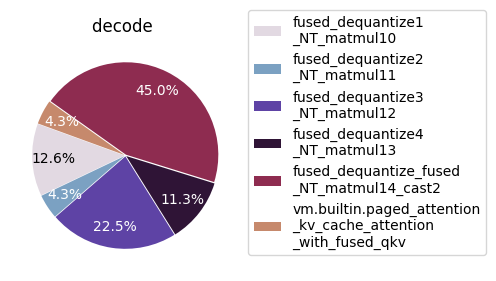

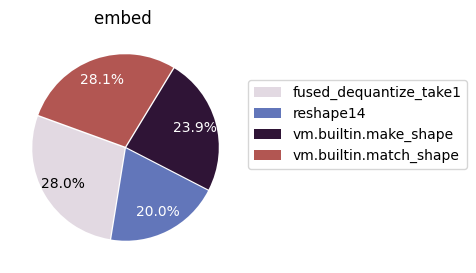

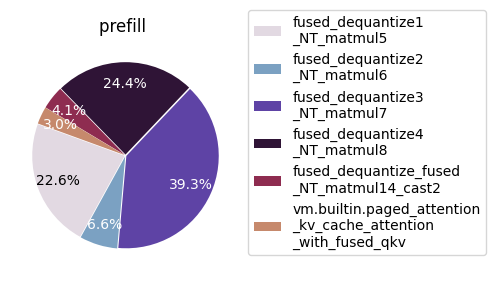

In [144]:
per_op_grouped = op_dfs.groupby(["Module", "Name"])[["Duration (us)", "Count", "iteration"]].mean()

# normalise duration per module
per_op_df = per_op_grouped.reset_index()
per_op_df["Duration norm"] = per_op_df.groupby("Module")['Duration (us)'].transform(lambda x: x / x.sum())
print(per_op_df.iteration.unique())
display(per_op_df)

def mapping(name):
    if name.startswith("fused_fused"):
        name = name.replace("fused_fused_", "fused_")
    if "_NT_matmul" in name:
        return name.replace("_NT_matmul", "\n_NT_matmul")
    if name == "vm.builtin.paged_attention_kv_cache_attention_with_fused_qkv":
        return "vm.builtin.paged_attention\n_kv_cache_attention\n_with_fused_qkv"
    return name
    print(name)
    if name.startswith("fused_fused_dequantize"): #and name != "fused_fused_dequantize_fused_NT_matmul14_cast2":
        return "fused_dequantize_matmul"
    elif name.startswith("vm.builtin"):
        return "vm.buildin.tensor_shape_ops"
    elif name in ["index", "shape_func3"]:
        return "tensor_shape_ops"
    else:
        return name


per_op_df["Grouped Name"] = per_op_df["Name"].apply(mapping)

# per_op_df[["Duration (us)", "Count", "iteration", "Duration norm"]]
per_op_df = per_op_df.groupby(["Module", "Grouped Name"]).sum()
display(per_op_df)


cmap = plt.cm.twilight
for group, df in per_op_df.reset_index().groupby("Module"):
    df = df[df["Duration norm"] > 0.01]
    colors = cmap(np.linspace(0, 1, len(df)+1))
    ax = df.set_index("Grouped Name").plot.pie(y="Duration norm", figsize=(4,3), legend=True, startangle=160,
                                               ylabel='', labeldistance=None, autopct='%1.1f%%', pctdistance=0.77,
                                               colors=colors, explode=[0.01] * len(df), textprops={'color':"w"},
                                               title=group)
    for text in ax.texts:
        if text.get_text() in ["12.6%", "28.0%", "22.6%"]:
            text.set_color("k")
        print(text)

    # handles, previous_labels = ax.get_legend_handles_labels()
    # replace vm.builtin.paged_attention_kv_cache_attention_with_fused_qkv with vm.builtin.paged_attention_kv_cache_attention in previous_labels
    # new_labels = [label.replace("vm.builtin.paged_attention_kv_cache_attention_with_fused_qkv", "vm.builtin.paged_attention\n_kv_cache_attention_with_fused_qkv") for label in previous_labels]
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.6))

    plt.savefig(f'./figures/per_op_mlc_llama_{group.strip()}.pdf', bbox_inches='tight')